<a href="https://colab.research.google.com/github/munisdev86/fastai-dl-pt1/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Testing integration with github
1+1

2

In [3]:
print('New commit')

New commit


In [4]:
!python -V


Python 3.7.15


In [5]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
print(iskaggle)

if iskaggle:
    !pip install -Uqq fastai

In [6]:
!pip freeze|grep fast

fastai==2.7.10
fastcore==1.5.27
fastdownload==0.0.7
fastdtw==0.3.4
fastjsonschema==2.16.2
fastprogress==1.0.3
fastrlock==0.8.1


In [7]:
!pip install -Uqq duckduckgo_search


     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 96 kB 7.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [8]:
!pip freeze|grep duck

duckduckgo-search==2.7.0


In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [10]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG'

In [11]:
print(type(urls))

<class 'fastcore.foundation.L'>


In [12]:
print(len(urls))

1


In [13]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

Path('bird.jpg')

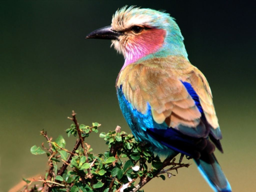

In [14]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

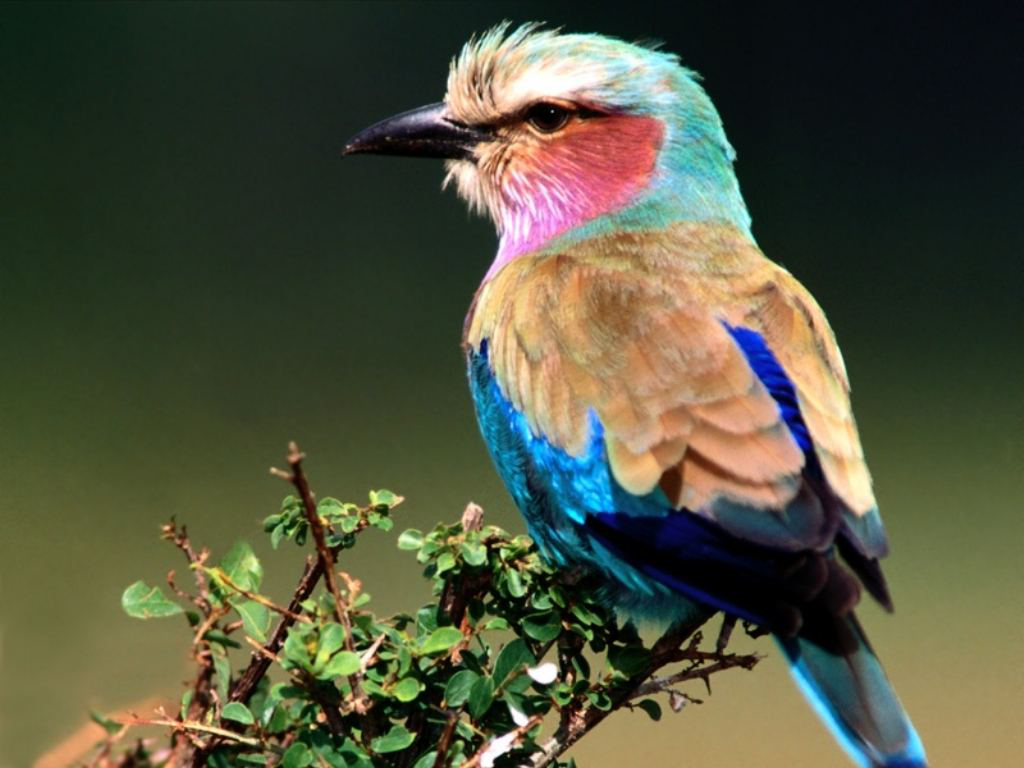

In [15]:
im.to_thumb(1024,1024)

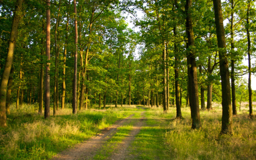

In [16]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=True)
Image.open('forest.jpg').to_thumb(256,256)

In [17]:
print(dest)


bird.jpg


In [18]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [19]:
!pwd


/content


In [20]:
!ls 


bird.jpg  bird_or_not  forest.jpg  sample_data


In [26]:
ls bird_or_not/forest/| wc -l

527


In [22]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

23

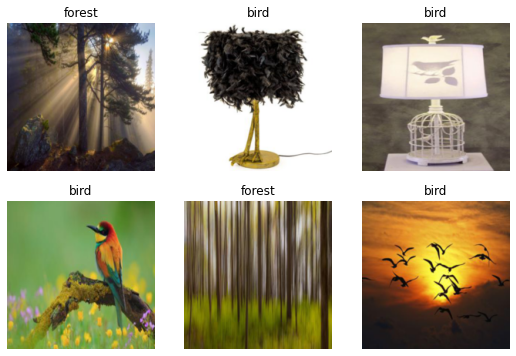

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

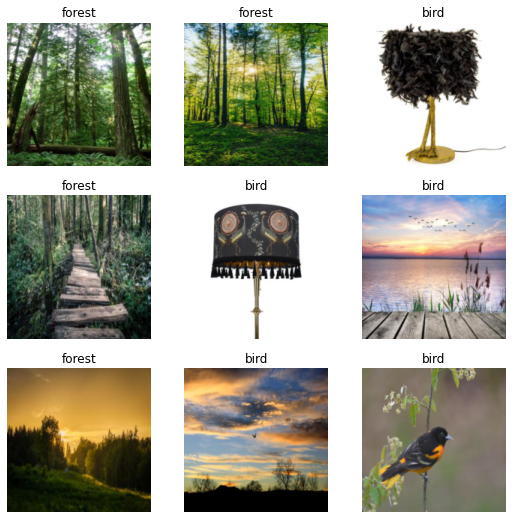

In [27]:
dls.show_batch(max_n=9)

In [28]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.489893,0.113033,0.033175,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.116984,0.065392,0.023697,00:05
1,0.071981,0.095276,0.023697,00:05
2,0.044021,0.092758,0.023697,00:05


In [29]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [30]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000


In [31]:
probs

TensorBase([7.8171e-07, 1.0000e+00])